In [78]:
import pandas as pd

In [79]:
#dataset we using
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

### Step 1 Data Loading and understanding the structure 

In [80]:
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
# Data informations 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Step 2   Handling Missing Values 

In [82]:
# lets check missing count of all columns 

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age is 177 are missing  which means 20% of data    we can fill with mean/median/mode     beacuse age is important

Cabin 687 are missing   over 75% of data    better droping the column 

Embarked 2 missing values only   we can will with mode   small missing count is not a issue 

In [83]:
# Filling age column with median 

df['Age'] = df['Age'].fillna(df['Age'].median())

In [84]:
# Droping the Cabin Column

df = df.drop(columns=['Cabin'])

In [85]:
# Filling Embarked column with mode

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [86]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Step 3 Encoding Categorical Variable

In [87]:
# 1 Labeled encoding using for SEX

df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [88]:
# 2  One-Hot encoding for Embarked 

df = pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [89]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False


### Step 4 Handling Outliers

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns


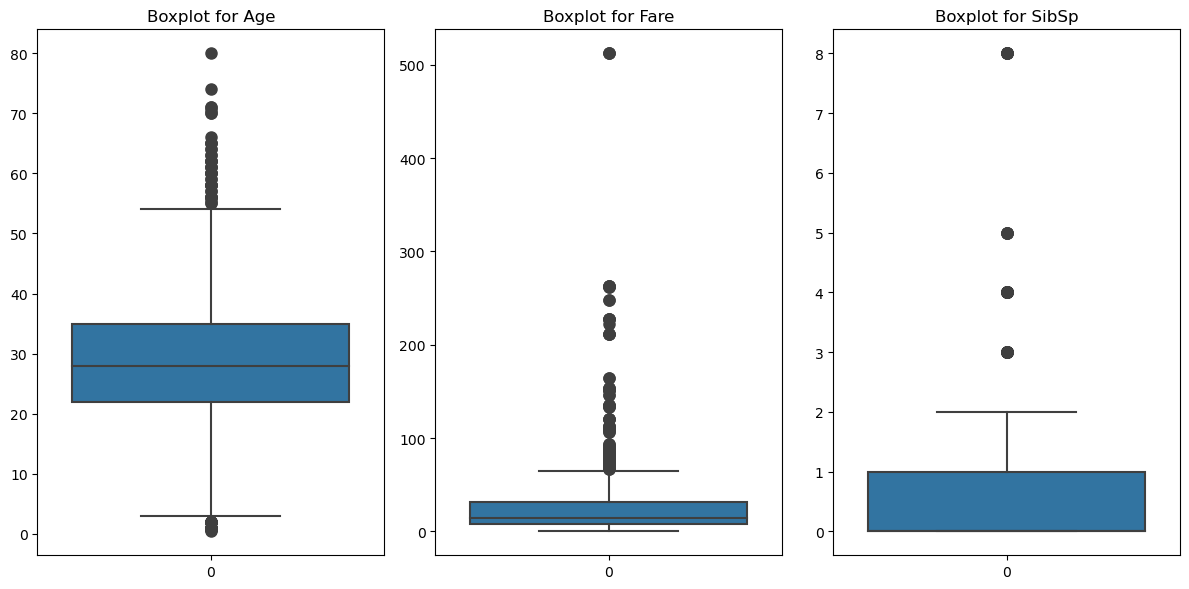

In [91]:
#lets check the numerical column 

num_col = ['Age','Fare','SibSp']
plt.figure(figsize=(12,6))
for i,col in enumerate(num_col,1):
    plt.subplot(1,3,i)
    sns.boxplot(df[col],flierprops=dict(marker='o',color='red',markersize=8))
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

In [92]:
# Check outliers in 'Fare' by looking at values outside of 1.5 * IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_fare = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

print("Outliers in 'Fare':")
print(outliers_fare[['Fare']])

Outliers in 'Fare':
         Fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
52    76.7292
..        ...
846   69.5500
849   89.1042
856  164.8667
863   69.5500
879   83.1583

[116 rows x 1 columns]


In [93]:
# Check for outliers in 'Age'
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
outliers_age = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]


print("\nOutliers in 'Age':")
print(outliers_age[['Age']])


Outliers in 'Age':
       Age
7     2.00
11   58.00
15   55.00
16    2.00
33   66.00
..     ...
827   1.00
829  62.00
831   0.83
851  74.00
879  56.00

[66 rows x 1 columns]


In [94]:
# Check for outliers in 'SibSp'

# Calculate Q1, Q3, and IQR for 'SibSp'
Q1_sip = df['SibSp'].quantile(0.25)
Q3_sip = df['SibSp'].quantile(0.75)
IQR_sip = Q3_sip - Q1_sip

# Calculate lower and upper bounds for outliers
lower_bound_sip = Q1_sip - 1.5 * IQR_sip
upper_bound_sip = Q3_sip + 1.5 * IQR_sip

# Find outliers in 'SibSp'
outliers_sip = df[(df['SibSp'] < lower_bound_sip) | (df['SibSp'] > upper_bound_sip)]

# Print outliers in 'SibSp'
print("\nOutliers in 'SibSp':")
print(outliers_sip[['SibSp']])



Outliers in 'SibSp':
     SibSp
7        3
16       4
24       3
27       3
50       4
59       5
63       3
68       4
71       5
85       3
88       3
119      4
159      8
164      4
171      4
176      3
180      8
182      4
201      8
229      3
233      4
261      4
266      4
278      4
324      8
341      3
374      3
386      5
409      3
480      5
485      3
541      4
542      4
634      3
642      3
683      5
686      4
726      3
787      4
792      8
813      4
819      3
824      4
846      8
850      4
863      8


now we only identified the outliers  we need  handle it usinf some techniques that can do later 

### Step 5 Feature Scaling

In [95]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [96]:
scaler_standard = StandardScaler()
scaler_minmax    = MinMaxScaler()

In this we try out both this approach let see 

#### Standard Scale

In [97]:
df['Age_stand'] = scaler_standard.fit_transform(df[['Age']])
df['Fare_stand'] = scaler_standard.fit_transform(df[['Fare']])
df['SibSp_stand'] = scaler_standard.fit_transform(df[['SibSp']])

In [98]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Age_stand,Fare_stand,SibSp_stand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True,-0.565736,-0.502445,0.432793
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False,0.663861,0.786845,0.432793
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True,-0.258337,-0.488854,-0.474545
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True,0.433312,0.420730,0.432793


#### MinMax Scaler

In [99]:
df['Age_minmax'] = scaler_minmax.fit_transform(df[['Age']])
df['Fare_minmax'] = scaler_minmax.fit_transform(df[['Fare']])
df['SibSp_minmax'] = scaler_minmax.fit_transform(df[['SibSp']])

In [100]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Age_stand,Fare_stand,SibSp_stand,Age_minmax,Fare_minmax,SibSp_minmax
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True,-0.565736,-0.502445,0.432793,0.271174,0.014151,0.125
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False,0.663861,0.786845,0.432793,0.472229,0.139136,0.125
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True,-0.258337,-0.488854,-0.474545,0.321438,0.015469,0.000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True,0.433312,0.420730,0.432793,0.434531,0.103644,0.125


####  Completed Data Cleaning.................

# FEATURE ENGINEERING

In [101]:
# Lets make  age groups

bins = [0,12,18,60,100]
labels = ['Child','Teen','Adult','Senior']

df['Age_group'] = pd.cut(df['Age'],bins=bins,labels=labels)

print(df[['Age','Age_group']].head())

    Age Age_group
0  22.0     Adult
1  38.0     Adult
2  26.0     Adult
3  35.0     Adult
4  35.0     Adult


In [102]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [103]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Age_stand,Fare_stand,SibSp_stand,Age_minmax,Fare_minmax,SibSp_minmax,Age_group,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True,-0.565736,-0.502445,0.432793,0.271174,0.014151,0.125,Adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False,0.663861,0.786845,0.432793,0.472229,0.139136,0.125,Adult,2


We can change embarked_Q and embarked_s as 0 & 1 for better understand          

In [104]:
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df["Embarked_S"] = df['Embarked_S'].astype(int)

In [105]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Age_stand,Fare_stand,SibSp_stand,Age_minmax,Fare_minmax,SibSp_minmax,Age_group,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,-0.565736,-0.502445,0.432793,0.271174,0.014151,0.125,Adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0,0.663861,0.786845,0.432793,0.472229,0.139136,0.125,Adult,2


# Lets Do some EDA   

## 1 Univarite Analysis 

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\shahe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


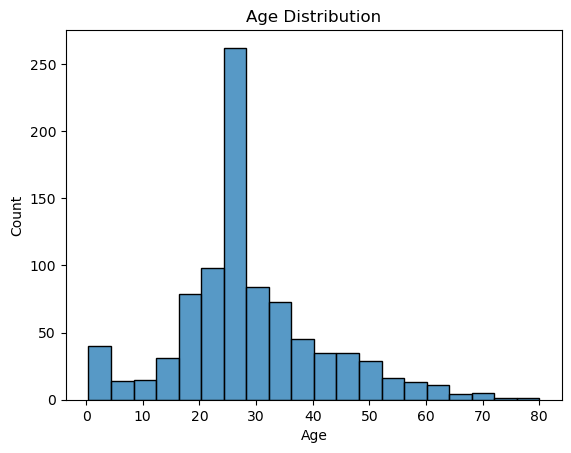

In [107]:
# Age Distribution 
sns.histplot(df['Age'],bins=20)
plt.title("Age Distribution")
plt.show()

In [108]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

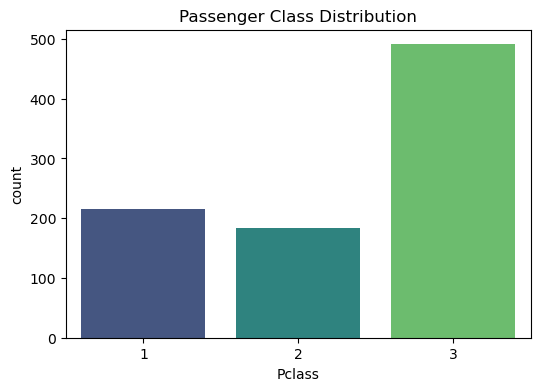

In [109]:
# Count plot for Pclass
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df, palette='viridis')
plt.title('Passenger Class Distribution')
plt.show()

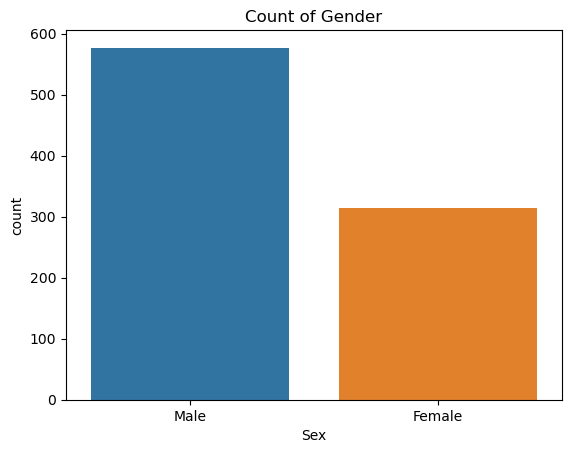

In [110]:
# Count gender 
sns.countplot(x='Sex',data=df)
plt.title("Count of Gender")
plt.xticks([0,1],['Male','Female'])
plt.show()

## 2 Bivarite Analysis

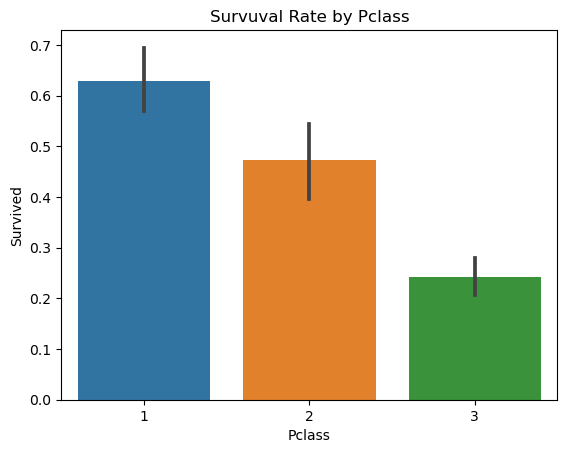

In [111]:
# Survival rate based on Pclass

sns.barplot(x='Pclass',y='Survived',data=df)
plt.title("Survuval Rate by Pclass")
plt.show()

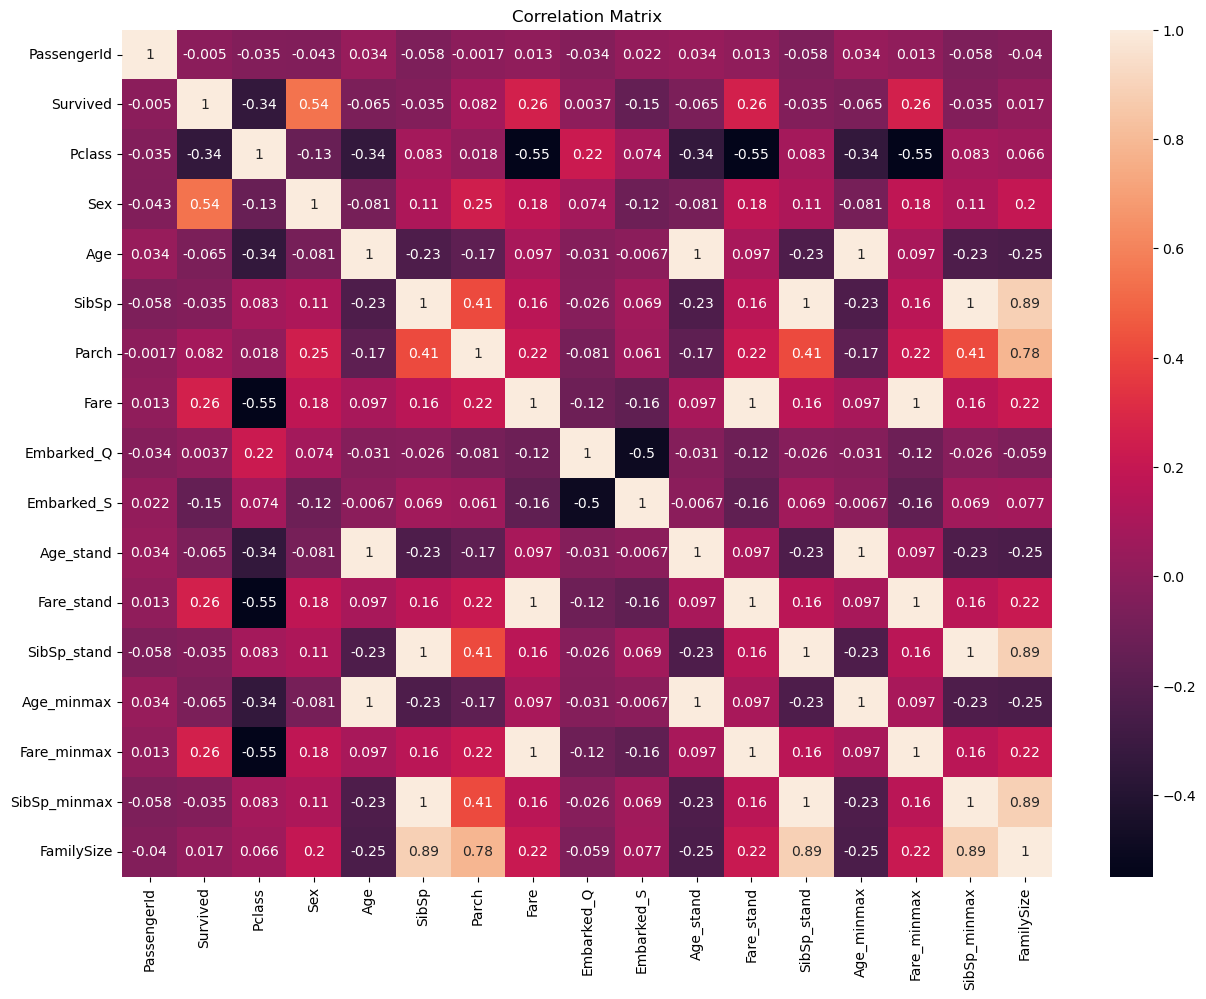

In [112]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 11))
# Calculate correlation matrix
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [113]:
# We need Drop coulmn name   which is not important for us    
df = df.drop(['Name'],axis=1)

In [114]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Age_stand,Fare_stand,SibSp_stand,Age_minmax,Fare_minmax,SibSp_minmax,Age_group,FamilySize
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,1,-0.565736,-0.502445,0.432793,0.271174,0.014151,0.125,Adult,2
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0,0,0.663861,0.786845,0.432793,0.472229,0.139136,0.125,Adult,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,-0.258337,-0.488854,-0.474545,0.321438,0.015469,0.000,Adult,1
3,4,1,1,1,35.0,1,0,113803,53.1000,0,1,0.433312,0.420730,0.432793,0.434531,0.103644,0.125,Adult,2
4,5,0,3,0,35.0,0,0,373450,8.0500,0,1,0.433312,-0.486337,-0.474545,0.434531,0.015713,0.000,Adult,1


In [115]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked_Q      0
Embarked_S      0
Age_stand       0
Fare_stand      0
SibSp_stand     0
Age_minmax      0
Fare_minmax     0
SibSp_minmax    0
Age_group       0
FamilySize      0
dtype: int64

In [116]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply Label Encoding to 'Age_group'
df['Age_group'] = label_encoder.fit_transform(df['Age_group'])

We have cleaned our data, handled missing values, done some feature engineering, checked some EDA,I
dentified outliers, but we haven't handled them yet. We can address them later. 
Now, our data is ready for making predictions

###  Feature Selection and Split Our data for Train and test   

In [117]:
from sklearn.model_selection import train_test_split
feature = ['Pclass','Sex','Age_stand','Fare_stand','SibSp_stand','Embarked_Q','Embarked_S','Age_group','FamilySize']
X = df[feature] 
y = df['Survived']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (668, 9), Test shape: (223, 9)


# Train the Model using a Algo (Logistic Regression)

In [118]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)




#prediction 
y_pred = model.predict(X_test)

In [119]:
print("Model Prediction are : \n ",y_pred)

Model Prediction are : 
  [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0]


## Evalution Matrics 

In [120]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_lr = accuracy_score(y_test,y_pred)
c_report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [121]:
print("Accuracy of our model is : ",accuracy_lr)
print("Classification Report is : \n ",c_report)
print("Confusion MAtrix is :  \n",cm)

Accuracy of our model is :  0.8071748878923767
Classification Report is : 
                precision    recall  f1-score   support

           0       0.83      0.86      0.84       134
           1       0.77      0.73      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223

Confusion MAtrix is :  
 [[115  19]
 [ 24  65]]


# KNN 

In [122]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN model with desired number of neighbors (e.g., n_neighbors=5)
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)


In [123]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_knn = accuracy_score(y_test,y_pred)
c_report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [124]:
print("Accuracy of our model is : ",accuracy_knn)
print("Classification Report is : \n ",c_report)
print("Confusion MAtrix is :  \n",cm)

Accuracy of our model is :  0.8161434977578476
Classification Report is : 
                precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.79      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.81      0.82      0.81       223

Confusion MAtrix is :  
 [[117  17]
 [ 24  65]]


# Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)



In [126]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_rf = accuracy_score(y_test,y_pred)
c_report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print("Accuracy:", accuracy_rf)
print("Classification Report:\n", c_report)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8071748878923767
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       134
           1       0.76      0.75      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

Confusion Matrix:
 [[113  21]
 [ 22  67]]


### Here is the Accuracy of 3 different Models 

In [127]:
print("Accuracy of Logistic Regression : ", accuracy_lr)
print("Accuracy of k-NN : ", accuracy_knn)
print("Accuracy of Random Forest : ", accuracy_rf)


Accuracy of Logistic Regression :  0.8071748878923767
Accuracy of k-NN :  0.8161434977578476
Accuracy of Random Forest :  0.8071748878923767


In [ ]:
"C:\Users\shahe\DATA SCIENCE WEEK WISE STARTING\WEEK 15  EDA\Titanic dataset.ipynb"